In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [59]:
data_file = "audio_features.csv"

df = pd.read_csv(data_file)
pd.set_option('display.max_columns', None)
df

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,mel_0,mel_1,mel_2,mel_3,mel_4,mel_5,mel_6,mel_7,mel_8,mel_9,mel_10,mel_11,mel_12,mel_13,mel_14,mel_15,mel_16,mel_17,mel_18,mel_19,mel_20,mel_21,mel_22,mel_23,mel_24,mel_25,mel_26,mel_27,mel_28,mel_29,mel_30,mel_31,mel_32,mel_33,mel_34,mel_35,mel_36,mel_37,mel_38,mel_39,mel_40,mel_41,mel_42,mel_43,mel_44,mel_45,mel_46,mel_47,mel_48,mel_49,mel_50,mel_51,mel_52,mel_53,mel_54,mel_55,mel_56,mel_57,mel_58,mel_59,mel_60,mel_61,mel_62,mel_63,mel_64,mel_65,mel_66,mel_67,mel_68,mel_69,mel_70,mel_71,mel_72,mel_73,mel_74,mel_75,mel_76,mel_77,mel_78,mel_79,mel_80,mel_81,mel_82,mel_83,mel_84,mel_85,mel_86,mel_87,mel_88,mel_89,mel_90,mel_91,mel_92,mel_93,mel_94,mel_95,mel_96,mel_97,mel_98,mel_99,mel_100,mel_101,mel_102,mel_103,mel_104,mel_105,mel_106,mel_107,mel_108,mel_109,mel_110,mel_111,mel_112,mel_113,mel_114,mel_115,mel_116,mel_117,mel_118,mel_119,mel_120,mel_121,mel_122,mel_123,mel_124,mel_125,mel_126,mel_127,lyric_0,lyric_1,lyric_2,lyric_3,lyric_4,lyric_5,lyric_6,lyric_7,lyric_8,lyric_9,lyric_10,lyric_11,lyric_12,lyric_13,lyric_14,lyric_15,lyric_16,lyric_17,lyric_18,lyric_19,lyric_20,lyric_21,lyric_22,lyric_23,lyric_24,lyric_25,lyric_26,lyric_27,lyric_28,lyric_29,lyric_30,lyric_31,lyric_32,lyric_33,lyric_34,lyric_35,lyric_36,lyric_37,lyric_38,lyric_39,lyric_40,lyric_41,lyric_42,lyric_43,lyric_44,lyric_45,lyric_46,lyric_47,lyric_48,lyric_49,lyric_50,lyric_51,lyric_52,lyric_53,lyric_54,lyric_55,lyric_56,lyric_57,lyric_58,lyric_59,lyric_60,lyric_61,lyric_62,lyric_63,lyric_64,lyric_65,lyric_66,lyric_67,lyric_68,lyric_69,lyric_70,lyric_71,lyric_72,lyric_73,lyric_74,lyric_75,lyric_76,lyric_77,lyric_78,lyric_79,lyric_80,lyric_81,lyric_82,lyric_83,lyric_84,lyric_85,lyric_86,lyric_87,lyric_88,lyric_89,lyric_90,lyric_91,lyric_92,lyric_93,lyric_94,lyric_95,lyric_96,lyric_97,lyric_98,lyric_99,label
0,-177.53653,146.581310,-0.213761,41.228962,0.291190,19.701117,-14.081721,12.296306,-2.576464,-2.150595,4.339947,-4.343766,0.628467,-5.329404,0.075212,-4.354529,0.513913,-3.582065,-2.392741,-3.715229,0.411439,0.486644,0.550818,0.477316,0.499035,0.523470,0.365942,0.343171,0.375355,0.468421,0.397482,0.363219,103.075530,283.917600,190.964050,104.999500,70.826294,40.696760,48.396954,39.866318,48.330746,47.567070,65.594500,26.664543,16.059223,26.066881,8.023824,6.560778,9.290979,11.783270,12.171549,8.743134,11.207910,12.714543,5.688521,4.344077,6.815128,3.400586,5.094750,9.803142,4.099811,1.879592,2.263550,2.487741,4.108537,2.208640,1.719356,2.236730,2.016826,1.127379,0.972732,1.288436,0.872762,1.159349,1.022214,1.126490,1.198486,1.034105,0.933061,0.684346,1.020923,0.897400,0.647819,0.709234,0.713876,0.947022,0.908746,0.697249,1.016017,0.987729,0.663537,0.511290,0.727437,0.661066,0.636771,0.589480,0.584139,0.470780,0.568177,0.518038,0.511439,0.509263,0.355044,0.287939,0.290094,0.300506,0.236947,0.238290,0.215294,0.237830,0.212603,0.176991,0.154490,0.131374,0.116294,0.096092,0.094899,0.108742,0.088728,0.077661,0.088157,0.083618,0.075280,0.071812,0.074179,0.077172,0.067056,0.070895,0.065022,0.063768,0.076176,0.070324,0.069271,0.066738,0.077959,0.085333,0.079367,0.068581,0.054471,0.040985,0.034418,0.028478,0.025743,0.018835,0.011994,0.008142,0.006198,0.004648,0.001715,0.000130,1.715324e-09,8.726396e-10,2.951443e-10,2.019676e-10,3.808507e-10,1.879035e-10,3.153673e-10,1.235672e-10,3.696249e-10,1.710140e-10,0.000000,0.267746,0.029773,0.000000,0.030886,0.105489,0.000000,0.057496,0.000000,0.056977,0.096160,0.0,0.000000,0.000000,0.075456,0.000000,0.109496,0.000000,0.600857,0.127779,0.000000,0.000000,0.080406,0.139981,0.235972,0.341420,0.000000,0.000000,0.074296,0.000000,0.000000,0.036499,0.157806,0.067512,0.088955,0.000000,0.054160,0.000000,0.000000,0.024364,0.140671,0.128692,0.000000,0.000000,0.025392,0.10171

In [60]:
df['label'].value_counts()

,count
label,
Nhạc trẻ,1567
Trữ tình,1159
Hiphop,663
Thiếu nhi,484


In [61]:
X = df.iloc[:, :-1].values
y = pd.get_dummies(df["label"]).values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X.reshape(X.shape[0], 1, X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)
X.shape

(3873, 1, 260)

Label distribution in training set:
0    0.171078
1    0.404777
2    0.124919
3    0.299225
Name: proportion, dtype: float64

Label distribution in test set:
0    0.171613
1    0.403871
2    0.125161
3    0.299355
Name: proportion, dtype: float64


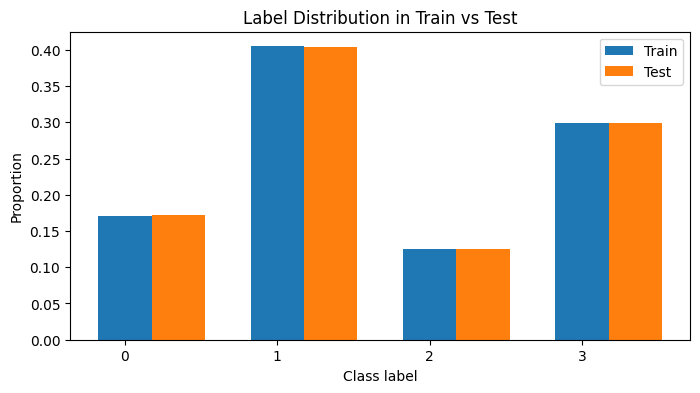


Features with significant distribution difference (KS-test p < 0.05):
Feature 6: KS statistic=0.055, p-value=0.04350
Feature 26: KS statistic=0.056, p-value=0.04113
Feature 175: KS statistic=0.086, p-value=0.00020
Feature 186: KS statistic=0.056, p-value=0.03664
Feature 219: KS statistic=0.060, p-value=0.02346
Feature 237: KS statistic=0.056, p-value=0.03830
Feature 240: KS statistic=0.055, p-value=0.04355


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ks_2samp

y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

train_label_counts = pd.Series(y_train_labels).value_counts(normalize=True).sort_index()
test_label_counts = pd.Series(y_test_labels).value_counts(normalize=True).sort_index()

print("Label distribution in training set:")
print(train_label_counts)
print("\nLabel distribution in test set:")
print(test_label_counts)

plt.figure(figsize=(8,4))
index = np.arange(len(train_label_counts))
bar_width = 0.35
plt.bar(index, train_label_counts, bar_width, label='Train')
plt.bar(index + bar_width, test_label_counts, bar_width, label='Test')
plt.xlabel('Class label')
plt.ylabel('Proportion')
plt.title('Label Distribution in Train vs Test')
plt.xticks(index, train_label_counts.index)
plt.legend()
plt.show()

X_train_2d = X_train.reshape(X_train.shape[0], X_train.shape[2])
X_test_2d = X_test.reshape(X_test.shape[0], X_test.shape[2])

ks_results = []
for i in range(X_train_2d.shape[1]):
    stat, p_value = ks_2samp(X_train_2d[:, i], X_test_2d[:, i])
    ks_results.append((i, stat, p_value))

print("\nFeatures with significant distribution difference (KS-test p < 0.05):")
for i, stat, p in ks_results:
    if p < 0.05:
        print(f"Feature {i}: KS statistic={stat:.3f}, p-value={p:.5f}")



In [150]:
from tensorflow.keras.regularizers import l2
model = Sequential([
    Bidirectional(LSTM(32, return_sequences=True, dropout=0.3, recurrent_dropout=0.2,
                       kernel_regularizer=l2(0.01)), input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(16, dropout=0.3, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(y_train.shape[1], activation="softmax")
])

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_48                │ (None, 1, 64)          │        75,008 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_52 (LSTM)                  │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,580 (314.77 KB)

 Trainable params: 80,420 (314.14 KB)

 Non-trainable params: 160 (640.00 B)

In [151]:
from tensorflow.keras.callbacks import ModelCheckpoint

early = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)


checkpoint = ModelCheckpoint(
    filepath="best_model.h5",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

callbacks = [early, reduce_lr, checkpoint]


In [152]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=150,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3323 - loss: 5.2226
Epoch 1: val_loss improved from inf to 3.69344, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.3349 - loss: 5.1918 - val_accuracy: 0.6529 - val_loss: 3.6934 - learning_rate: 0.0010
Epoch 2/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5332 - loss: 3.4361
Epoch 2: val_loss improved from 3.69344 to 2.82876, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5335 - loss: 3.4339 - val_accuracy: 0.7897 - val_loss: 2.8288 - learning_rate: 0.0010
Epoch 3/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6701 - loss: 2.6093
Epoch 3: val_loss improved from 2.82876 to 2.07546, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6710 - loss: 2.6047 - val_accuracy: 0.8426 - val_loss: 2.0755 - learning_rate: 0.0010
Epoch 4/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7595 - loss: 2.0452
Epoch 4: val_loss improved from 2.07546 to 1.56587, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7596 - loss: 2.0443 - val_accuracy: 0.8632 - val_loss: 1.5659 - learning_rate: 0.0010
Epoch 5/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8064 - loss: 1.6540
Epoch 5: val_loss improved from 1.56587 to 1.26748, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8066 - loss: 1.6522 - val_accuracy: 0.8697 - val_loss: 1.2675 - learning_rate: 0.0010
Epoch 6/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8221 - loss: 1.3563
Epoch 6: val_loss improved from 1.26748 to 1.04939, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8221 - loss: 1.3555 - val_accuracy: 0.8774 - val_loss: 1.0494 - learning_rate: 0.0010
Epoch 7/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8416 - loss: 1.1417
Epoch 7: val_loss improved from 1.04939 to 0.90822, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8416 - loss: 1.1413 - val_accuracy: 0.8826 - val_loss: 0.9082 - learning_rate: 0.0010
Epoch 8/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8389 - loss: 1.0040
Epoch 8: val_loss improved from 0.90822 to 0.80203, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8392 - loss: 1.0028 - val_accuracy: 0.8877 - val_loss: 0.8020 - learning_rate: 0.0010
Epoch 9/150
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8419 - loss: 0.9120
Epoch 9: val_loss improved from 0.80203 to 0.70863, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8423 - loss: 0.9101 - val_accuracy: 0.8903 - val_loss: 0.7086 - learning_rate: 0.0010
Epoch 10/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8603 - loss: 0.7967
Epoch 10: val_loss improved from 0.70863 to 0.63533, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8601 - loss: 0.7965 - val_accuracy: 0.8955 - val_loss: 0.6353 - learning_rate: 0.0010
Epoch 11/150
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8642 - loss: 0.7288
Epoch 11: val_loss improved from 0.63533 to 0.59082, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8640 - loss: 0.7284 - val_accuracy: 0.8942 - val_loss: 0.5908 - learning_rate: 0.0010
Epoch 12/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8608 - loss: 0.7157
Epoch 12: val_loss improved from 0.59082 to 0.55529, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8608 - loss: 0.7155 - val_accuracy: 0.8981 - val_loss: 0.5553 - learning_rate: 0.0010
Epoch 13/150
91/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8550 - loss: 0.6570 
Epoch 13: val_loss improved from 0.55529 to 0.52804, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8557 - loss: 0.6555 - val_accuracy: 0.8955 - val_loss: 0.5280 - learning_rate: 0.0010
Epoch 14/150
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8625 - loss: 0.6040
Epoch 14: val_loss improved from 0.52804 to 0.52022, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8625 - loss: 0.6039 - val_accuracy: 0.8877 - val_loss: 0.5202 - learning_rate: 0.0010
Epoch 15/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8670 - loss: 0.5925
Epoch 15: val_loss improved from 0.52022 to 0.49908, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8666 - loss: 0.5934 - val_accuracy: 0.8929 - val_loss: 0.4991 - learning_rate: 0.0010
Epoch 16/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8638 - loss: 0.5795
Epoch 16: val_loss improved from 0.49908 to 0.47986, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8637 - loss: 0.5795 - val_accuracy: 0.9006 - val_loss: 0.4799 - learning_rate: 0.0010
Epoch 17/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8644 - loss: 0.5616
Epoch 17: val_loss improved from 0.47986 to 0.45262, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8644 - loss: 0.5615 - val_accuracy: 0.9045 - val_loss: 0.4526 - learning_rate: 0.0010
Epoch 18/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8784 - loss: 0.5695
Epoch 18: val_loss did not improve from 0.45262
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8783 - loss: 0.5694 - val_accuracy: 0.9032 - val_loss: 0.4535 - learning_rate: 0.0010
Epoch 19/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8767 - loss: 0.5479
Epoch 19: val_loss did not improve from 0.45262
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8765 - loss: 0.5486 - val_accuracy: 0.8981 - val_loss: 0.4609 - learning_rate: 0.0010
Epoch 20/150
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8674 - loss: 0.5561
Epoch 20: val_loss did not improve from 0.45262
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8673 - loss: 0.5561 - val_accuracy: 0.8929 - val_loss: 0.4563 - learning_rate: 0.0010
Epoch 21/150
95/97 ━━━━━━━━━━━━━━━━━━

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8668 - loss: 0.5369 - val_accuracy: 0.8994 - val_loss: 0.4485 - learning_rate: 0.0010
Epoch 22/150
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8817 - loss: 0.5078
Epoch 22: val_loss improved from 0.44850 to 0.44306, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8809 - loss: 0.5087 - val_accuracy: 0.8981 - val_loss: 0.4431 - learning_rate: 0.0010
Epoch 23/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8736 - loss: 0.5179
Epoch 23: val_loss improved from 0.44306 to 0.43199, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8734 - loss: 0.5186 - val_accuracy: 0.8981 - val_loss: 0.4320 - learning_rate: 0.0010
Epoch 24/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8764 - loss: 0.5036
Epoch 24: val_loss did not improve from 0.43199
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8762 - loss: 0.5040 - val_accuracy: 0.8890 - val_loss: 0.4422 - learning_rate: 0.0010
Epoch 25/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8595 - loss: 0.5396
Epoch 25: val_loss did not improve from 0.43199
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8597 - loss: 0.5388 - val_accuracy: 0.8839 - val_loss: 0.4327 - learning_rate: 0.0010
Epoch 26/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8750 - loss: 0.5000
Epoch 26: val_loss improved from 0.43199 to 0.43168, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8748 - loss: 0.5007 - val_accuracy: 0.8981 - val_loss: 0.4317 - learning_rate: 0.0010
Epoch 27/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8763 - loss: 0.4939
Epoch 27: val_loss did not improve from 0.43168
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8762 - loss: 0.4943 - val_accuracy: 0.8955 - val_loss: 0.4328 - learning_rate: 0.0010
Epoch 28/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8652 - loss: 0.5144
Epoch 28: val_loss did not improve from 0.43168
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8653 - loss: 0.5143 - val_accuracy: 0.8916 - val_loss: 0.4597 - learning_rate: 0.0010
Epoch 29/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8826 - loss: 0.4831
Epoch 29: val_loss improved from 0.43168 to 0.42572, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8825 - loss: 0.4835 - val_accuracy: 0.8890 - val_loss: 0.4257 - learning_rate: 0.0010
Epoch 30/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8691 - loss: 0.5072
Epoch 30: val_loss did not improve from 0.42572
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8690 - loss: 0.5076 - val_accuracy: 0.8890 - val_loss: 0.4286 - learning_rate: 0.0010
Epoch 31/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8742 - loss: 0.5022
Epoch 31: val_loss did not improve from 0.42572
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8739 - loss: 0.5027 - val_accuracy: 0.8877 - val_loss: 0.4323 - learning_rate: 0.0010
Epoch 32/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8687 - loss: 0.5088
Epoch 32: val_loss improved from 0.42572 to 0.42340, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8688 - loss: 0.5089 - val_accuracy: 0.8903 - val_loss: 0.4234 - learning_rate: 0.0010
Epoch 33/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8818 - loss: 0.4943
Epoch 33: val_loss improved from 0.42340 to 0.41970, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8816 - loss: 0.4946 - val_accuracy: 0.8994 - val_loss: 0.4197 - learning_rate: 0.0010
Epoch 34/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8660 - loss: 0.5178
Epoch 34: val_loss did not improve from 0.41970
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8661 - loss: 0.5176 - val_accuracy: 0.8994 - val_loss: 0.4216 - learning_rate: 0.0010
Epoch 35/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8781 - loss: 0.4980
Epoch 35: val_loss improved from 0.41970 to 0.41183, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8780 - loss: 0.4980 - val_accuracy: 0.9019 - val_loss: 0.4118 - learning_rate: 0.0010
Epoch 36/150
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8758 - loss: 0.4767
Epoch 36: val_loss did not improve from 0.41183
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8758 - loss: 0.4774 - val_accuracy: 0.9097 - val_loss: 0.4191 - learning_rate: 0.0010
Epoch 37/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8876 - loss: 0.4777
Epoch 37: val_loss did not improve from 0.41183
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8872 - loss: 0.4788 - val_accuracy: 0.9032 - val_loss: 0.4124 - learning_rate: 0.0010
Epoch 38/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8800 - loss: 0.4975
Epoch 38: val_loss did not improve from 0.41183
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8798 - loss: 0.4977 - val_accuracy: 0.8903 - val_loss: 0.4470 - learning_rate: 0.0010
Epoch 39/150
96/97 ━━━━━━━━━━━━━━━━━━━

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8885 - loss: 0.4390 - val_accuracy: 0.8968 - val_loss: 0.4023 - learning_rate: 5.0000e-04
Epoch 42/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8950 - loss: 0.4399
Epoch 42: val_loss improved from 0.40228 to 0.39972, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8950 - loss: 0.4399 - val_accuracy: 0.9019 - val_loss: 0.3997 - learning_rate: 5.0000e-04
Epoch 43/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8848 - loss: 0.4271
Epoch 43: val_loss improved from 0.39972 to 0.39675, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8847 - loss: 0.4274 - val_accuracy: 0.9006 - val_loss: 0.3967 - learning_rate: 5.0000e-04
Epoch 44/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8803 - loss: 0.4454
Epoch 44: val_loss did not improve from 0.39675
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8804 - loss: 0.4451 - val_accuracy: 0.8942 - val_loss: 0.4037 - learning_rate: 5.0000e-04
Epoch 45/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8903 - loss: 0.4204
Epoch 45: val_loss did not improve from 0.39675
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8903 - loss: 0.4204 - val_accuracy: 0.8981 - val_loss: 0.3985 - learning_rate: 5.0000e-04
Epoch 46/150
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8915 - loss: 0.4031
Epoch 46: val_loss improved from 0.39675 to 0.39171, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8916 - loss: 0.4037 - val_accuracy: 0.8968 - val_loss: 0.3917 - learning_rate: 5.0000e-04
Epoch 47/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8837 - loss: 0.4326
Epoch 47: val_loss improved from 0.39171 to 0.38535, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8836 - loss: 0.4329 - val_accuracy: 0.8942 - val_loss: 0.3853 - learning_rate: 5.0000e-04
Epoch 48/150
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9000 - loss: 0.3948
Epoch 48: val_loss improved from 0.38535 to 0.38509, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8997 - loss: 0.3957 - val_accuracy: 0.9006 - val_loss: 0.3851 - learning_rate: 5.0000e-04
Epoch 49/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8895 - loss: 0.4179
Epoch 49: val_loss improved from 0.38509 to 0.37867, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8894 - loss: 0.4179 - val_accuracy: 0.9019 - val_loss: 0.3787 - learning_rate: 5.0000e-04
Epoch 50/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8886 - loss: 0.4103
Epoch 50: val_loss did not improve from 0.37867
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8888 - loss: 0.4101 - val_accuracy: 0.8981 - val_loss: 0.3822 - learning_rate: 5.0000e-04
Epoch 51/150
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8905 - loss: 0.3942
Epoch 51: val_loss improved from 0.37867 to 0.37768, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8903 - loss: 0.3954 - val_accuracy: 0.8968 - val_loss: 0.3777 - learning_rate: 5.0000e-04
Epoch 52/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8878 - loss: 0.4092
Epoch 52: val_loss improved from 0.37768 to 0.36853, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8879 - loss: 0.4094 - val_accuracy: 0.8994 - val_loss: 0.3685 - learning_rate: 5.0000e-04
Epoch 53/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8982 - loss: 0.3841
Epoch 53: val_loss did not improve from 0.36853
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8979 - loss: 0.3845 - val_accuracy: 0.8877 - val_loss: 0.3925 - learning_rate: 5.0000e-04
Epoch 54/150
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9013 - loss: 0.3793 
Epoch 54: val_loss did not improve from 0.36853
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9007 - loss: 0.3805 - val_accuracy: 0.8981 - val_loss: 0.3689 - learning_rate: 5.0000e-04
Epoch 55/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9017 - loss: 0.3728
Epoch 55: val_loss improved from 0.36853 to 0.36679, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9015 - loss: 0.3731 - val_accuracy: 0.8994 - val_loss: 0.3668 - learning_rate: 5.0000e-04
Epoch 56/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8934 - loss: 0.3954
Epoch 56: val_loss did not improve from 0.36679
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8933 - loss: 0.3954 - val_accuracy: 0.9019 - val_loss: 0.3741 - learning_rate: 5.0000e-04
Epoch 57/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8897 - loss: 0.4038
Epoch 57: val_loss did not improve from 0.36679
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8899 - loss: 0.4034 - val_accuracy: 0.8955 - val_loss: 0.3824 - learning_rate: 5.0000e-04
Epoch 58/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8967 - loss: 0.3899 
Epoch 58: val_loss did not improve from 0.36679
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8967 - loss: 0.3900 - val_accuracy: 0.8916 - val_loss: 0.3808 - learning_rate: 5.0000e-04
Epoch 59/150
97/97 

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9033 - loss: 0.3843 - val_accuracy: 0.8955 - val_loss: 0.3655 - learning_rate: 2.5000e-04
Epoch 61/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9028 - loss: 0.3771
Epoch 61: val_loss improved from 0.36548 to 0.35598, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9028 - loss: 0.3770 - val_accuracy: 0.9019 - val_loss: 0.3560 - learning_rate: 2.5000e-04
Epoch 62/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9043 - loss: 0.3636
Epoch 62: val_loss did not improve from 0.35598
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9043 - loss: 0.3636 - val_accuracy: 0.8981 - val_loss: 0.3567 - learning_rate: 2.5000e-04
Epoch 63/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9041 - loss: 0.3547
Epoch 63: val_loss improved from 0.35598 to 0.34790, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9040 - loss: 0.3551 - val_accuracy: 0.9045 - val_loss: 0.3479 - learning_rate: 2.5000e-04
Epoch 64/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8896 - loss: 0.3744
Epoch 64: val_loss improved from 0.34790 to 0.34750, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8899 - loss: 0.3738 - val_accuracy: 0.8968 - val_loss: 0.3475 - learning_rate: 2.5000e-04
Epoch 65/150
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9074 - loss: 0.3520
Epoch 65: val_loss improved from 0.34750 to 0.34425, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9073 - loss: 0.3520 - val_accuracy: 0.9019 - val_loss: 0.3443 - learning_rate: 2.5000e-04
Epoch 66/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9066 - loss: 0.3523
Epoch 66: val_loss improved from 0.34425 to 0.33854, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9065 - loss: 0.3524 - val_accuracy: 0.9019 - val_loss: 0.3385 - learning_rate: 2.5000e-04
Epoch 67/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9069 - loss: 0.3449
Epoch 67: val_loss did not improve from 0.33854
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9067 - loss: 0.3453 - val_accuracy: 0.8994 - val_loss: 0.3443 - learning_rate: 2.5000e-04
Epoch 68/150
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9048 - loss: 0.3395
Epoch 68: val_loss did not improve from 0.33854
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9050 - loss: 0.3398 - val_accuracy: 0.9019 - val_loss: 0.3477 - learning_rate: 2.5000e-04
Epoch 69/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9029 - loss: 0.3560
Epoch 69: val_loss did not improve from 0.33854
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9028 - loss: 0.3557 - val_accuracy: 0.9058 - val_loss: 0.3396 - learning_rate: 2.5000e-04
Epoch 70/150
96/97 ━━

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9124 - loss: 0.3280 - val_accuracy: 0.8994 - val_loss: 0.3371 - learning_rate: 1.2500e-04
Epoch 73/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9121 - loss: 0.3249
Epoch 73: val_loss did not improve from 0.33707
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9121 - loss: 0.3250 - val_accuracy: 0.8968 - val_loss: 0.3388 - learning_rate: 1.2500e-04
Epoch 74/150
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9031 - loss: 0.3381
Epoch 74: val_loss improved from 0.33707 to 0.33480, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9030 - loss: 0.3384 - val_accuracy: 0.9032 - val_loss: 0.3348 - learning_rate: 1.2500e-04
Epoch 75/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9086 - loss: 0.3314
Epoch 75: val_loss did not improve from 0.33480
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9086 - loss: 0.3314 - val_accuracy: 0.9045 - val_loss: 0.3403 - learning_rate: 1.2500e-04
Epoch 76/150
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9196 - loss: 0.3212
Epoch 76: val_loss did not improve from 0.33480
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9194 - loss: 0.3214 - val_accuracy: 0.9019 - val_loss: 0.3368 - learning_rate: 1.2500e-04
Epoch 77/150
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9087 - loss: 0.3373
Epoch 77: val_loss did not improve from 0.33480
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9086 - loss: 0.3374 - val_accuracy: 0.9045 - val_loss: 0.3469 - learning_rate: 1.2500e-04
Epoch 78/150
96/97 

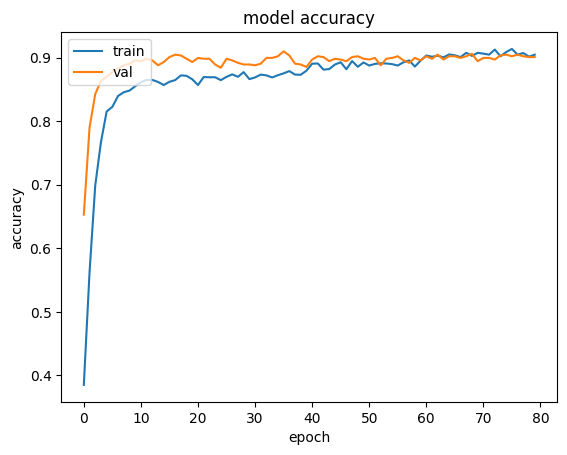

In [153]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

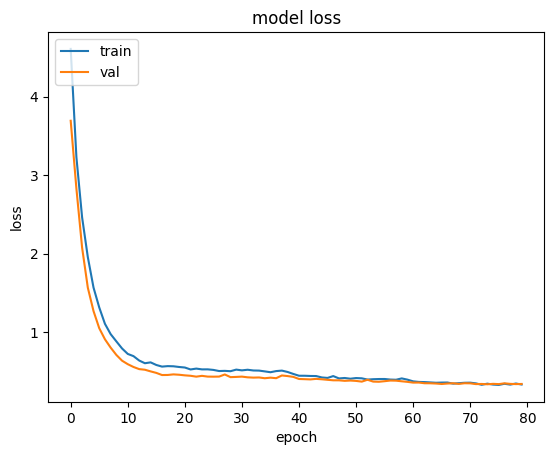

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

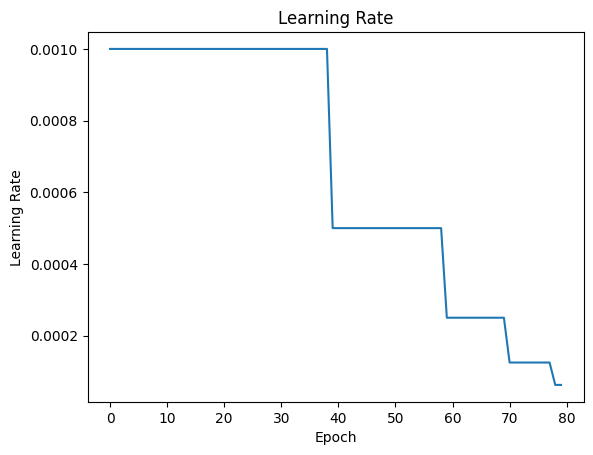

In [158]:
# plot learning rate
plt.plot(history.history['learning_rate'])
plt.title('Learning Rate')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step


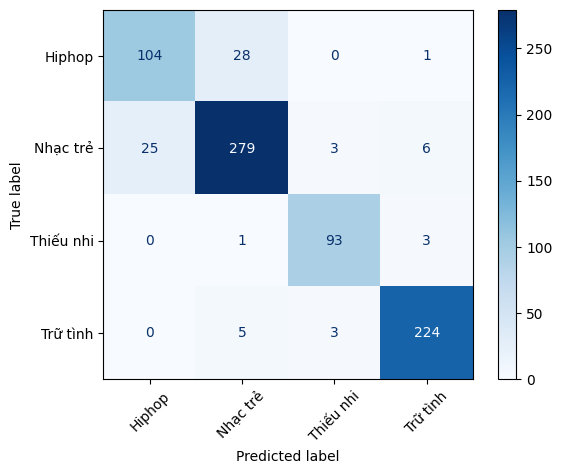

In [156]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

labels_text = pd.get_dummies(df["label"]).columns.tolist()

cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_text)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

In [159]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       133
           1       0.89      0.89      0.89       313
           2       0.94      0.96      0.95        97
           3       0.96      0.97      0.96       232

    accuracy                           0.90       775
   macro avg       0.90      0.90      0.90       775
weighted avg       0.90      0.90      0.90       775



In [160]:
import pickle
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

labels_text = ['Hiphop', 'Nhạc trẻ', 'Thiếu nhi', 'Trữ tình']

cm = confusion_matrix(y_true, y_pred_classes)
report = classification_report(y_true, y_pred_classes, target_names=labels_text, output_dict=True)

history = {
    'loss': history.history['loss'],
    'val_loss': history.history.get('val_loss'),
    'accuracy': history.history.get('accuracy'),
    'val_accuracy': history.history.get('val_accuracy'),
    'learning_rate': history.history.get('learning_rate'),
    'confusion_matrix': cm,
    'classification_report': report,
    'labels_text': labels_text,
}

with open('history.pkl', 'wb') as f:
    pickle.dump(history, f)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [161]:
from google.colab import files
files.download("best_model.h5")
files.download('history.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>